## Abstract

In this report the equations that dictate the temperature of a homogenous medium at various positions and times are observed. The exact equation is a partial differential equation that can be simplified into a numerical difference equation. There also exists an exact fourier series solution that can be used to verify the accuracy of the numerical solution. The numerical solution is first tested with a 1 dimensional rod of finite length insulated on both ends. Then, the numerical solution is tested with a 3 dimensional symmetrical sphere insulated along the surface. Our results show that for the 1D rod, our numerical solution deviated by $0.1732 \pm 0.0234\%$. For the 3D sphere our numerical solution deviated by $0.0816 \pm 0.0284\%$.

## Physical System and Model

Heat conduction is the transfer of heat from one solid to another. The heat flows from high temperature to low temperature. When a solid has different temperatures at different positions, the heat will flow through the object from high temperatures to low temperatures. If the surrounding insulation of the object is at a constant 0 degrees, the system will eventually converge to 0 degrees at every position. The temperature at different positions of a physical system is described via the partial differential heat equation:

\begin{equation} \label{eq:1}
\alpha^2 \nabla^2 T = \frac{\partial T}{\partial t}
\end{equation}

In order to utizilize this equation, it can be simplified to a difference equation to produce a numerical solution. It can also be solved using Fourier series solutions that provide exact solutions. The numerical solution, however, has its limitations. The partial differential equation works for all points, but the numerical solution only works for a finite set of points. The accuracy of the numerical solution depends on the parameter $\beta$, where:

\begin{equation} \label{eq:2}
\beta = \alpha^2 \Delta t / h^2
\end{equation}
 
where $\alpha$ is dependent on the material used, $\Delta t$ is the time step, and $h$ is the position step. The numerical solution can either converge with stability on the exact solution, or diverge entirely. Based on O'brien's exact solution to the heat equation:

\begin{equation} \label{eq:3}
T(x, t) = \frac{2}{M} \Sigma^{M-1}_{i=1,3,5} \cot{(\frac{j\pi}{2M})} \times \sin{(\Pi j x)} \left(1 - 4\beta \sin{(\frac{\Pi j}{2 M})}\right)^k
\end{equation}

The following must be true for the last factor in the above equation to be finite:

\begin{equation} \label{eq:4}
\beta = \alpha^2 \Delta t/h^2\leq \frac{1}{2}
\end{equation}

Therefore $\beta$ must be chosen to be less than 0.5 in order for the solution to converge with stability. The value $h$, or the position step size, is often chosen to be 1 for convenience. By choosing $h$, $\Delta t$ can be found using the constraint on $\beta$ above.

For the 1D rod and 3D sphere, $\beta$ was chosen to be $1/6$ which follows the constraint of being less than $1/2$. This ensures convergence of the mathematical model.

## Algorithms

The algorithm used to simulate the heat expansion is an iterative method. In this method, one start from an intial condition, and generate a sequence of results, each based on the previous result. 

In the particular problem of heat expansion in uniform density objects, a partial differential equation describing the heat expansion is converted into a finite difference equation that only considers a small finite number of points in the object. 

The partial differential equation is 

\begin{equation} \label{eq:1}
\alpha^2 \nabla^2 T = \frac{\partial T}{\partial t}
\end{equation}

In the 1-D case, equation 1 reduces to

\begin{equation} \label{eq:2}
\frac{\alpha^2 \partial^2 T}{\partial x^2} = \frac{\partial T}{\partial t}
\end{equation}

And the finite difference equation is 

\begin{equation} \label{eq:3}
T(m, n+1) = T(m, n) + (\frac{\alpha^2 \Delta t}{h^2}) \times [T(m+1, n) + T(m-1, n) - 2T(m, n)]
\end{equation}

For the 3-D case, the finite difference equation becomes

\begin{equation} \label{eq:4}
V(m, n+1) = V(m, n) + (\frac{\alpha^2 \Delta t}{h^2}) \times [V(m+1, n) + V(m-1, n) - 2V(m, n)]
\end{equation}

where 

\begin{equation} \label{eq:5}
T(r, t) = \frac{V(r, t)}{r}
\end{equation}

It is notable that, as explained in previous sections, the value $\beta = \alpha^2 \Delta t / h^2$ should be smaller than or equal to 1/2 to ensure both stability and convergence of the difference equation. And in this report, $\beta$ is taken as 1/6. With the $\alpha^2 = 1.10407 cm^2/sec$ given by the property of copper and $h$ chosen to be 1cm, we can compute $\Delta t = \frac{h^2 \beta}{\alpha^2} = 0.150956s$

And for the simulation of heat flow, we just incorporate euqation 3 and 4 into the iterative methods. 
A 2d array whose row number is the number of time steps to simulate, and column number is the number of points to simulate is generated. Given the inital condition, the method runs according to equation 3 and 4. 

It is notable that the simulation of 3d case is a bit trickier, since our 2d array in this case contains simulation for V rather than T, and the relation $T(r, t) = \frac{V(r, t)}{r}$ makes the center point, at which $r=0$ hard to deal with. We chose to impute the simulation of temperature according to $T(0,t) = 3 T(1,t) - 3 T(2,t) + T(3,t)$. We also add a restriction that the simulation of temperatures should agree with reality. Namely, in the isolated object with ends held at 0 degree case, the simulated temperature at a given time and position should not be larger than the temperature of the position previously.

## Code

In [72]:
# CODE
import numpy as np
import matplotlib.pyplot as plt


def arrayT1D(timeLength, size, initialTemp = 100, beta=1/6):
    T0 = np.ones((size)) * initialTemp
    T0[0] = 0
    T0[size - 1] = 0
    array = np.ones((timeLength + 1, size)) * -1
    array[0,:] = np.copy(T0)
    for i in range(1,timeLength+1):
        for j in range(size):
            if j == 0 or j == len(T0)-1:
                array[i,j]=0
            else:
                array[i,j] = array[i-1,j] + (beta *(array[i-1, j+1] + array[i-1, j-1] - 2*array[i-1,j]))
    return array

def exact1D(x, t, limit, size=20, alpha2=1.10407, initialTemp = 100):
    sum0 = 0
    for i in range(1, limit, 2):
        coeff = (4 * initialTemp)/(i * np.pi)
        term1 = np.exp(-((((i * np.pi)/size)**2)*alpha2*t))
        term2 = np.sin((i * np.pi) * (x / size))
        sum0 += coeff * term1 * term2
    return sum0


                   
def arrayT3D(n, beta=1/6, initialTemp = 100., size=51):
    V0 = np.ones((size)) * initialTemp
    V0[0] = 0
    for i in range(26):
        V0[25+i] *= i
        V0[25-i] *= i

    V0[size - 1] = 0
    
    array = np.ones((n + 1, size)) * -1
    arrayT = np.ones((n + 1, size)) * -1
    array[0,:] = np.copy(V0)
    for k in range(1,26):
            arrayT[0, 25+k] = array[0, 25+k]/k
            arrayT[0, 25-k] = array[0, 25+k]/k
    arrayT[0, 25] = array[0, 25]
    
    for i in range(1,n+1):
        for j in range(size):
            if j == 0 or j == len(V0)-1:
                array[i,j]=0
            else:
                array[i,j] = (2/3)*array[i-1,j] + (beta *(array[i-1, j+1] + array[i-1, j-1]))
            if array[i,j] > array[i-1,j]:
                array[i,j] = array[i-1,j]
        
        for k in range(1,26):
            arrayT[i, 25+k] = array[i, 25+k]/k
            arrayT[i, 25-k] = array[i, 25+k]/k
        arrayT[i, 25] = 3*arrayT[i, 26] - 3*arrayT[i, 27] + arrayT[i, 28] 
    return arrayT


def exact3D(x, t, limit, size=25, alpha2=1.10407, initialTemp = 100):
    sum0 = 0
    for i in range(1, limit):
        coeff = (2*initialTemp)*(-1)**(i+1)
        term1 = np.exp(-((((i * np.pi)/size)**2)*alpha2*t))
        term2 = np.sin((i * np.pi) * (x / size))
        term3 = 1/((i * np.pi) * (x / size))
        sum0 += coeff * term1 * term2 * term3
    return sum0


def get_errors(func, yvals, time, pos):
    errors = np.zeros((20), dtype=float)
    count = 0
    for i in time:
        for j in pos:
            exact = func(j, i*0.151, 10000)
            errors[count] = abs(exact-yvals[i,j])/exact
            count +=1
    return errors

## Results

In this section, the simulation of 1d and 3d cases are first generated with given intial condition and plotted to reproduce figure 2 and 3 in the original paper. 

The error of the simulation is then estimated by the comparison with exact solution, which is a Fourier series. The error for each time (for number of steps) is estimated by comparing with the exact solution at 4 positions. And mean of error is used as estimate, while standard deviation used for confidence interval (lower/upper bounds).

### Plot of simulations

#### 1D case

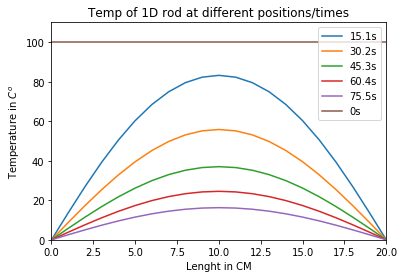

In [35]:
yvals1d = arrayT1D(900, 21, 100, 1/6)
xvals = np.linspace(0, 20, num=21)

timelist1d = np.array([100, 200, 300, 400, 500])
for i in timelist1d:
    plt.plot(xvals, yvals1d[i,:])

plt.plot(xvals, np.ones((21)) * 100)

plt.title('Temp of 1D rod at different positions/times')
plt.xlabel('Lenght in CM')
plt.ylabel('Temperature in $C^o$')
plt.axis((0, 20, 0, 110))
plt.legend(('15.1s', '30.2s', '45.3s', '60.4s', '75.5s', '0s'))
plt.show()

#### 3D case

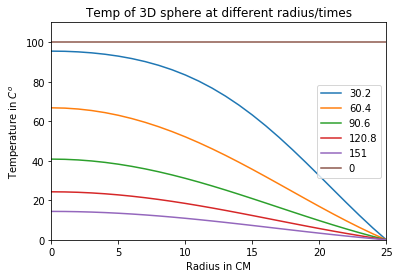

In [36]:
yvals3d = arrayT3D(1200)
xvals = np.linspace(0, 25, num=26)

timelist3d = np.array([200, 400, 600, 800, 1000])
for i in timelist3d:
    plt.plot(xvals, yvals3d[i,25:])

plt.plot(xvals, np.ones((26)) * 100)

plt.title('Temp of 3D sphere at different radius/times')
plt.xlabel('Radius in CM')
plt.ylabel('Temperature in $C^o$')
plt.axis((0, 25, 0, 110))
plt.legend(('30.2', '60.4', '90.6', '120.8', '151', '0'))

plt.show()

As we can compare with the original plot from the paper, these two plots are good recreation of the figure 2 and 3 of the paper. In the next section, we are to investigate the accuracy of our simulation compared with exact solutions.

### Error Invesitgation

#### Justification of Exact Result
The exact solutions for 1d and 3d cases are both Forier Series that sums up to infinity. We certainly cannot handle a infinite sum, so we propose to use an upper limit large enough for the exact solution. And by large enough, we want to show that at the chosen number of 10000, an increase of 10 times does not make the simulation change in the first 10 decimal digits.

In [30]:
chosen = exact1D(5, 15.1, 10000, 20, 1.10407)
more = exact1D(5, 15.1, 100000, 20, 1.10407)

print("The result of summing up to 10000 is %f"%chosen)
print("The result of summing up to 100000 is %f"%more)

The result of summing up to 10000 is 60.408551
The result of summing up to 100000 is 60.408551


#### Error Analysis

##### 1D case

In [73]:
pos1d = np.array([5, 10, 15, 17])
errors1d = get_errors(exact1D, yvals1d, timelist1d, pos1d)
print("Percent error for 1D case is: %0.4f (+/- %0.4f)"% (errors1d.mean()*100, errors1d.std()*100) + "%")

Percent error for 1D case is: 0.1732 (+/- 0.0234)%


##### 3D case

In [74]:
pos3d = np.array([1, 5, 13, 20])
errors3d = get_errors(exact3D, yvals3d[:,25:], timelist3d, pos3d)
print("Percent error for 3D case is: %0.4f (+/- %0.4f)"% (errors3d.mean()*100, errors3d.std()*100) + "%")

Percent error for 3D case is: 0.0816 (+/- 0.0284)%


From the errors above, we can tell that our numerical simulation is doing a decent job compared with exact solutions.

## References

Referenced paper: 

Numerical Solution to Transient Heat Flow Problems

Ronald A. Kobiske and Jeffrey L. Hock

https://aapt.scitation.org/doi/10.1119/1.1987281